In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

Load CIFAR-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Normalize pixel values to between 0 and 1

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Choose between ResNet50 or VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Freeze the convolutional base

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

Add custom dense layers

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


Create the final model

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 701s 895ms/step - accuracy: 0.4741 - loss: 1.4968 - val_accuracy: 0.5618 - val_loss: 1.2530
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 704s 846ms/step - accuracy: 0.5888 - loss: 1.1761 - val_accuracy: 0.5856 - val_loss: 1.1774
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 682s 846ms/step - accuracy: 0.6155 - loss: 1.1016 - val_accuracy: 0.6022 - val_loss: 1.1416
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 681s 845ms/step - accuracy: 0.6417 - loss: 1.0259 - val_accuracy: 0.6107 - val_loss: 1.1122
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 682s 846ms/step - accuracy: 0.6540 - loss: 0.9830 - val_accuracy: 0.6159 - val_loss: 1.1089
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 681s 845ms/step - accuracy: 0.6661 - loss: 0.9527 - val_accuracy: 0.6164 - val_loss: 1.1022
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 683s 847ms/step - accuracy: 0.6815 - loss: 0.9012 - val_accuracy: 0.6120 - val_loss: 1.1168
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 680s 844ms/step - accuracy: 0.6947 -

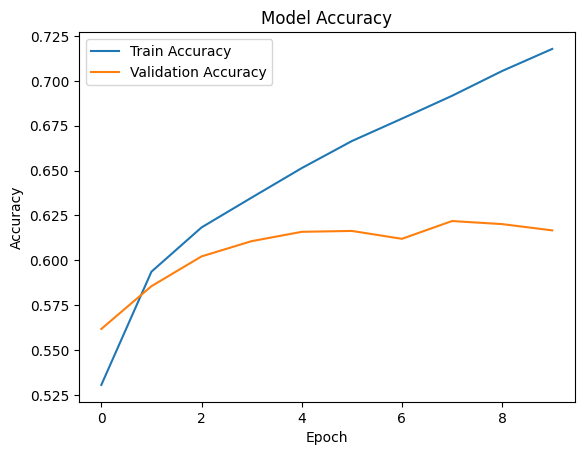

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

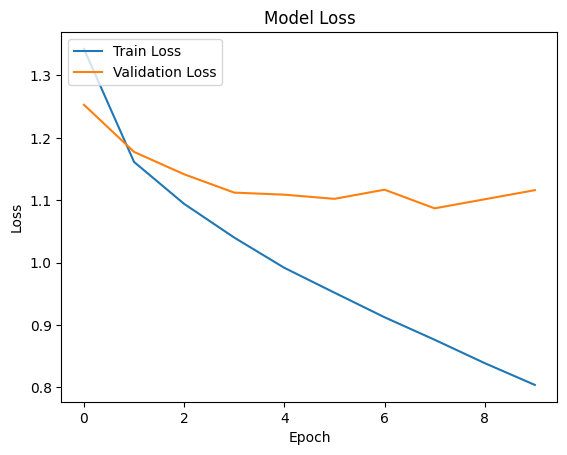

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [18]:
# prompt: accuray

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 357ms/step
Accuracy: 0.6167
Precision: 0.6267684390351456
Recall: 0.6167
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.77      0.59      0.67      1000
           2       0.52      0.60      0.55      1000
           3       0.44      0.48      0.46      1000
           4       0.65      0.47      0.55      1000
           5       0.59      0.47      0.52      1000
           6       0.70      0.62      0.66      1000
           7       0.59      0.77      0.67      1000
           8       0.74      0.74      0.74      1000
           9       0.57      0.72      0.63      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

